In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
PersLoan_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
PersLoan_df.head(10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Understanding column description in dataset

In [3]:


# Traget variable:    
# # Personal Loan		:		Did this customer accept the personal loan offered in the last campaign?

# Independent Variables:
# # ID			:		Customer ID
# # Age			:		Customer's age in completed years
# # Experience	:		#years of professional experience
# # Income		:		Annual income of the customer ($000)
# # ZIPCode		:		Home Address ZIP code.
# # Family		:		Family size of the customer
# # CCAvg		:		Avg. spending on credit cards per month ($000)
# # Education	:		Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# # Mortgage	:		Value of house mortgage if any. ($000)'
# # Securities Account	:		Does the customer have a securities account with the bank?
# # CD Account			:		Does the customer have a certificate of deposit (CD) account with the bank?
# # Online				:		Does the customer use internet banking facilities?
# # CreditCard			:		Does the customer use a credit card issued by UniversalBank?

# removing any spaces in the column names of the dataframe


In [4]:
# removing any spaces in the column names of the dataframe

PersLoan_df.columns = PersLoan_df.columns.str.replace(' ', '')
PersLoan_df.columns = PersLoan_df.columns.str.strip()
PersLoan_df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
PersLoan_df.info()
# there are 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# check if all the values in the data are numbers


In [6]:
#check if all the values in the data are numbers
PersLoan_df[~PersLoan_df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard


# Check for missing values

In [7]:
# checking for any missing values
PersLoan_df.isna().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [8]:
#There are not missing values

# remove negative values from the experience

In [9]:
#There are negative values in Experience column, removing negative values with absolute values

In [10]:
PersLoan_df[PersLoan_df.Experience<0]   #these are the negative values in experience column

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [11]:
PersLoan_df.Experience = PersLoan_df.Experience.abs()

In [12]:
PersLoan_df[PersLoan_df.Experience<0] #there are no negative values in the Experience column

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard


In [13]:
PersLoan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [14]:
# #All the 14 columns are displayed in the describe function above which means there are no NAN,NuLL,EMPTY values, 
# hence data is good  for modelling




In [15]:
#Before going for modelling , we need to analyse the columns of the data and drop the columns that do not affect the 
# Target variable

In [16]:
# Target Variable here is PersonalLoan column

In [17]:
# The variable that do not have any effect on Target Variable are:
#     - ID
#     - ZipCode


In [18]:
#Variable that effect the personal loan colum are:

# Age			:		Customer's age in completed years
# # Experience	:		#years of professional experience
# # Income		:		Annual income of the customer ($000)
# # Family		:		Family size of the customer
# # CCAvg		:		Avg. spending on credit cards per month ($000)
# # Education	:		Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# # Mortgage	:		Value of house mortgage if any. ($000)'
# # Securities Account	:		Does the customer have a securities account with the bank?
# # CD Account			:		Does the customer have a certificate of deposit (CD) account with the bank?
# # Online				:		Does the customer use internet banking facilities?
# # CreditCard			:		Does the customer use a credit card issued by UniversalBank?


# Get the target column distribution

In [19]:
PersLoan_df.groupby(["PersonalLoan"]).count()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


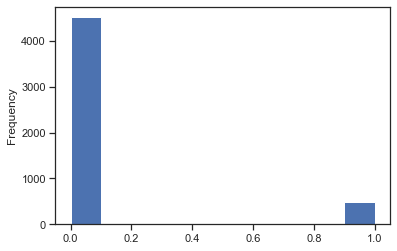

In [20]:
PersLoan_df['PersonalLoan'].plot(kind='hist')
plt.show()

In [21]:
# from the above data it pertty obvious that the :
#     - data is hugely baised towards the people not accepting personal loan
#     - the ratio of people not accpeting to people accpeting loan is 10:1
#     - this means that, with this data the model that we build will be very good at predecting who 
#         will not accept the personal loan
    
# however the problem at hand is to build a model that will predect potential customer who will accept personal loan



In [22]:
PersLoan1_df = PersLoan_df # creating a seperate copy of the data frame , this will be used for KNN modelling

# Study the data distribution in each attribute, share your findings


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


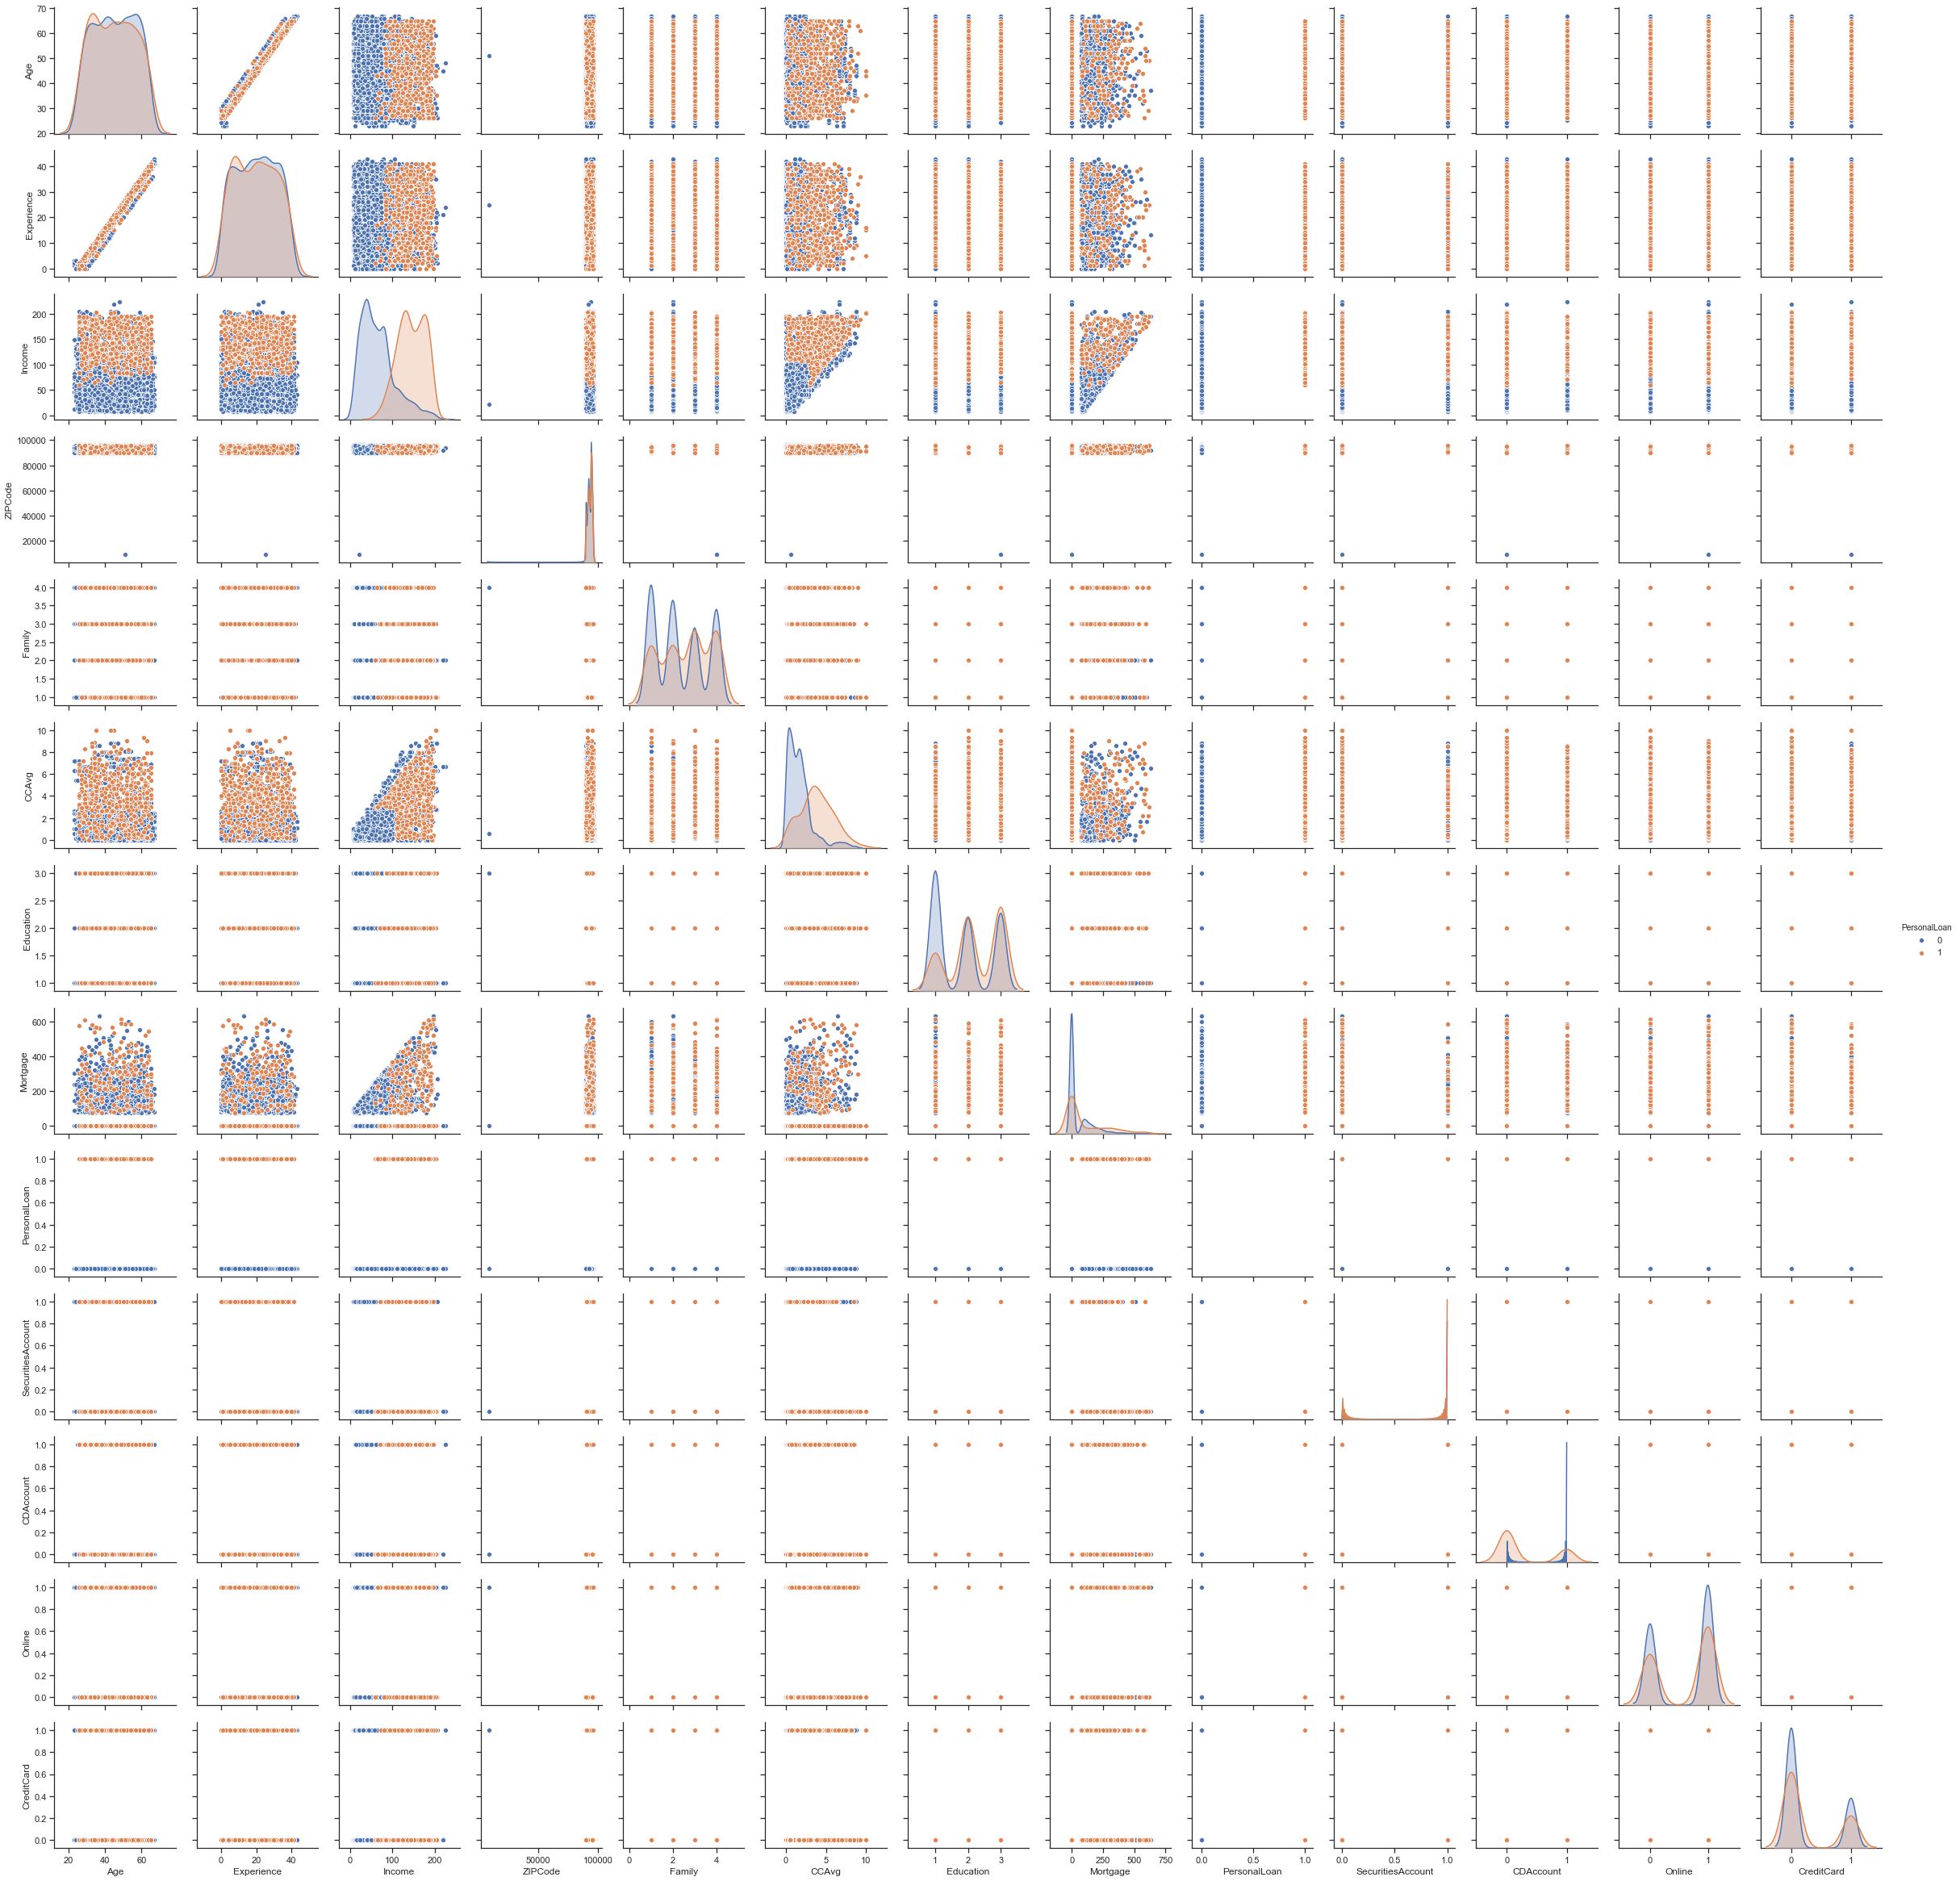

In [23]:
sns.pairplot(PersLoan_df.iloc[:,1:] , hue='PersonalLoan' , diag_kind = 'kde')

In [24]:


# Inference from the above plots:

#ID - this has not effect on Target variable hence this can be dropped

# Age and experience -- highly correlated, density plots for both the attributes overlap 
# for both classes and they are normally distributed hence one of the attributes can be dropped.

# INCOME: 
#  - people with higer income seem to apply more for personal loan -- so people with higher income are potential target


# ZipCode: Zip code does not seem to have much significance. This can be dropped while preparing model

# FAMILY SIZE : 
#  - People from all family sizes seem to apply for personal loan 
# however people with larger families(size >=3) seem to go for personal loan more.


# CCAVG:
#  - People with less credit card avg are not good candidates for personal loan. 
# People with personal loans seem to have higher credit card average. 

# EDUCATION :
#  - People from all education categories seem to go for personal 
# loan however undergraduates are less inclined to personal loan compared to others


# CDAccount: 
#  - Mostly, customers who does not have CD account , does not have loan also.
# But almost all customers who has CD account has loan as well


# SecurityAccounts:
# Majority of customers who does not have loan have securities account



# Perpare Training and Test Sets 70:30

In [25]:
# ID, ZIP and Experience are dropped as desribed in plot inferences above

In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(PersLoan_df.drop(['ID','ZIPCode','Experience'], axis=1), test_size=0.3 , random_state=53)

In [27]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

# LOGISTIC REGRESSIOM MODEL

In [28]:
model = LogisticRegression()
model.fit(train_set, train_labels)
y_predict = model.predict(test_set)
test_model_score = model.score(test_set , test_labels)
train_model_score = model.score(train_set , train_labels)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score for Logistic Regression Model

In [29]:
print("Score for trianing set is ", train_model_score)
print("Score for test set is ", test_model_score)


Score for trianing set is  0.9488571428571428
Score for test set is  0.9506666666666667


Confusion Matrix for Logistic Regression

In [30]:
print(metrics.confusion_matrix(test_labels, y_predict))
print(metrics.classification_report(test_labels, y_predict))

[[1340   12]
 [  62   86]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1352
           1       0.88      0.58      0.70       148

    accuracy                           0.95      1500
   macro avg       0.92      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



# Naive Bayes Model

In [31]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)



Score for Naive Bayes

In [32]:
trainaccuracy  = naive_model.score(train_set, train_labels)
testAccuracy  = naive_model.score(test_set,test_labels)
print ("Training set score ",trainaccuracy)
print ("Test set score ", testAccuracy)

Training set score  0.8854285714285715
Test set score  0.8973333333333333


Confusion Matrix for Naive Bayes

In [33]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1352
           1       0.88      0.58      0.70       148

    accuracy                           0.95      1500
   macro avg       0.92      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500

[[1340   12]
 [  62   86]]


In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict


scores = cross_val_score(model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.94301994 0.94017094 0.96       0.94571429 0.96571429 0.94285714
 0.95428571 0.95142857 0.9226361  0.94555874] [0.94301994 0.94017094 0.96       0.94571429 0.96571429 0.94285714
 0.95428571 0.95142857 0.9226361  0.94555874]
Average score: 0.947138572559776


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# KNN MODEL

In [35]:
X = PersLoan1_df.drop(["ZIPCode", "ID", "PersonalLoan"] , axis = 1)

y=PersLoan1_df[['PersonalLoan']]


X = X.apply(zscore)


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=7)



X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=7)
KNNH=KNeighborsClassifier()
KNNH.fit(X_train, y_train)

predicted_labels = KNNH.predict(X_train)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Score for KNN Model

In [36]:

## Train Accuracy
print("Score for training data is =", KNNH.score(X_train, y_train))
## Test accuracy
print("Score for test data is =", KNNH.score(X_test, y_test))

Score for training data is = 0.9694285714285714
Score for test data is = 0.9593333333333334


# FINE TUNING k VALUE

In [37]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# creating odd list of K for KNN
myList = list(range(1,60))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10, scoring='accuracy') #used ravel() as it was giving warnings
    cv_scores.append(scores.mean())

# changing to misclassification error
misError = [1 - x for x in cv_scores]

optimal_k = neighbors[misError.index(min(misError))]
print("The value of optimal K is = ",optimal_k)

The value of optimal K is =  5


# RE-RUN KNN WITH OPTIMAL K Value

In [38]:
NNH = KNeighborsClassifier(n_neighbors=optimal_k)
NNH.fit(X_train, y_train)


#Score for KNN model
print("Training Set Score",NNH.score(X_train, y_train))
print("Test Set Score ", NNH.score(X_test, y_test))


# Confusion matrix
knn_cm=metrics.confusion_matrix(y_test, NNH.predict(X_test))
knn_cm

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training Set Score 0.9694285714285714
Test Set Score  0.9593333333333334


array([[1354,    8],
       [  53,   85]], dtype=int64)

In [39]:
print(metrics.classification_report(y_test, NNH.predict(X_test)))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.91      0.62      0.74       138

    accuracy                           0.96      1500
   macro avg       0.94      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500



# Plot accuracy score vs k (with k value on X-axis)

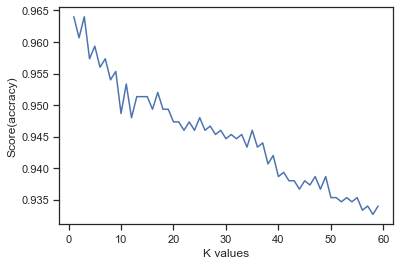

In [40]:
#find avaible value of k
score_list=[]
k_value=[]
for i in myList:
    knn_available=KNeighborsClassifier(n_neighbors=i)
    knn_available.fit(X_train,y_train.values.ravel())
    
    score_list.append(knn_available.score(X_test,y_test))
    k_value.append(i)
plt.plot(myList,score_list)
plt.xlabel("K values")
plt.ylabel("Score(accracy)")
plt.show()

# WHICH MODEL IS BETTER??

Looking at the Data Set its pretty clear that:
     - Data set is not that huge
     - also data set has less dimensions
     - Dataset does not have any missing values
    
    
Based on the above observations about dataset and looking at the accuracy scores of the models, we can conclude :
    - KNN model seems to have the highest accuracy 
     - Also KNN is favourable for above mentioned points about the data set
        - Hence for this specific case KNN seems to be the best model.